# FACET Data Analysis Example

The scripts in this repository make it easier to work with data from the FACET-II DAQ. This notebook provides some examples of basic usage.

The two most important modules are dataset and image which provide an interface for accessing and loading DAQ data, both scalars and images.

In [1]:
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

from dataset import DATASET
import mplstyle

## Load the Dataset

First download the dataset from SLAC by following these confluence instructions: https://confluence.slac.stanford.edu/display/FACET/Data+Retrieval Here, I'm using an E301 dataset from 2024-05-12, dataset 07960. The dataset is downloaded to the directory E:\Documents\SLAC\E301\E301_07960 on my computer, the dataset class assumes the directories have the following structure: 

```
root
|-E300
  |-E300_XXXXX
|-E301
  |-E301_07960
    |-E301_07960.mat
    |-images
      |-DTOTR1
        |-DTOTR1_data_step01_0000.tif
        |-DTOTR1_data_step01_0001.tif
        |-...
        |-DTOTR1_data_step11_0019.tif
      |-DTOTR2
        |-DTOTR2_data_step01_0000.tif
        |-DTOTR2_data_step01_0001.tif
        |-...
        |-DTOTR2_data_step11_0019.tif
  |-E301_XXXXX
|-E3XX
```

For HDF5 DAQs, the dataset structure is a little different:

```
|-E301_07960
  |-E301_07960.mat
  |-images
    |-DTOTR1
      |-DTOTR1_data_step01.h5
      |-DTOTR1_data_step02.h5
      |-...
      |-DTOTR1_data_step11.h5
    |-DTOTR2
      |-DTOTR2_data_step01.h5
      |-DTOTR2_data_step02.h5
      |-...
      |-DTOTR2_data_step11.h5
```

You'll have to update the path to the root directory where the datasets are stored on your computer. 

For each dataset you want to work with, instantiate an instance of the DATASET class:

In [2]:
dsN = "07960"
experiment = "E301"
ds = DATASET("E:\Documents\SLAC", experiment, dsN)

The class contains several attributes with general information about the dataset as well as some attributes that provide convenient access to the more useful parts of the DAQ data structure.

In [3]:
print(ds.dataPath)
print(ds.experiment)
print(ds.number)
print(ds.datasetPath)
print(ds.cameras)
print(ds.HDF5)
print(ds.timestamp)
print(ds.saveInfo.keys())
print(ds.params.keys())
print(ds.metadata.keys())

E:\Documents\SLAC
E301
07960
E:\Documents\SLAC\E301\E301_07960
['DTOTR2' 'DTOTR1']
False
2024-05-12 02:19:44.863970
dict_keys(['instance', 'experiment', 'local_time', 'matlab_timestamp', 'unix_timestamp', 'header', 'save_path', 'cam_paths'])
dict_keys(['include_nonBSA_arrays', 'experiment', 'rate', 'rate_name', 'doStream', 'EC', 'comment', 'n_shot', 'print2elog', 'saveBG', 'laserBG', 'nBG', 'blockBeam', 'camNames', 'camPVs', 'camSIOCs', 'camTrigs', 'num_CAM', 'BSA_list', 'nonBSA_list', 'nonBSA_Array_list', 'scanDim', 'scanFuncs', 'scanPVs', 'startVals', 'stopVals', 'scanVals', 'stepsAll', 'totalSteps', 'RBV_PVs', 'Waits', 'Tolerance', 'nSteps'])
dict_keys(['Event', 'DTOTR2', 'DTOTR1', 'BSA_List_S20', 'BSA_List_S14', 'BSA_List_S11', 'BSA_List_S10RF', 'BSA_List_S10', 'nonBSA_List_LINAC_KLYS', 'nonBSA_List_LaserS10', 'nonBSA_List_LaserS20', 'nonBSA_List_S10', 'nonBSA_List_S10RF', 'nonBSA_List_S11', 'nonBSA_List_S20', 'nonBSA_List_S20Magnets'])


## Accessing Matched Data

Each DAQ has two types of data, scalars and images. Often, the DAQ misses images from one camera or another. Shots were there is an image for every camera are called matched shots (pulse ids match for the scalars and all cameras). Most methods in the dataset class only return matched shots, but methods are provided to access unmatched shots as well.

### Scalars

To retrieve a scalar use ```getScalar``` you need to know the PV and the scalar list it is in.

The number of matched shots in the dataset is given by ```ds.N```

In [4]:
scalar = ds.getScalar("BSA_List_S14", "BPMS:LI14:801:X")
print(f"scalar has {len(scalar)} elements, the first element is {scalar[0]}")
print(f"{ds.N} matched shots in the dataset")

scalar has 220 elements, the first element is -0.9704586267471313
220 matched shots in the dataset


 If you don't know the name of the list you can find it using ```getListForPV```.

In [5]:
ds.getListForPV("BPMS:LI14:801:X")

'BSA_List_S14'

```scalarLists``` returns all scalar lists recorded in the dataset.

In [6]:
ds.scalarLists()

['BSA_List_S20',
 'BSA_List_S14',
 'BSA_List_S11',
 'BSA_List_S10RF',
 'BSA_List_S10',
 'nonBSA_List_LINAC_KLYS',
 'nonBSA_List_LaserS10',
 'nonBSA_List_LaserS20',
 'nonBSA_List_S10',
 'nonBSA_List_S10RF',
 'nonBSA_List_S11',
 'nonBSA_List_S20',
 'nonBSA_List_S20Magnets']

```PVsInList``` returns all the PVs within a given list.

In [7]:
ds.PVsInList("BSA_List_S14")

array(['TORO:LI14:890:TMIT', 'BPMS:LI14:701:X', 'BPMS:LI14:701:Y',
       'BPMS:LI14:701:TMIT', 'BPMS:LI14:715:X', 'BPMS:LI14:715:Y',
       'BPMS:LI14:715:TMIT', 'BPMS:LI14:801:X', 'BPMS:LI14:801:Y',
       'BPMS:LI14:801:TMIT', 'BPMS:LI14:891:X', 'BPMS:LI14:891:Y',
       'BPMS:LI14:891:TMIT', 'BPMS:LI14:901:X', 'BPMS:LI14:901:Y',
       'BPMS:LI14:901:TMIT', 'BLEN:LI14:888:BRAW'], dtype=object)

### Images

Retrieving images useing ```getImage```. The ```ind``` argument refers to the matched shotsonly, ind=10 will retrieve the 11th matched shot. The object returned is an instance of the IMAGE class with the image data as a ndarray stored in the ```data``` attribute. A Pillow image object of the data is stored in the ```image``` attribute. Images are automatically rotated to match the rotation as seen on the profile monitor.

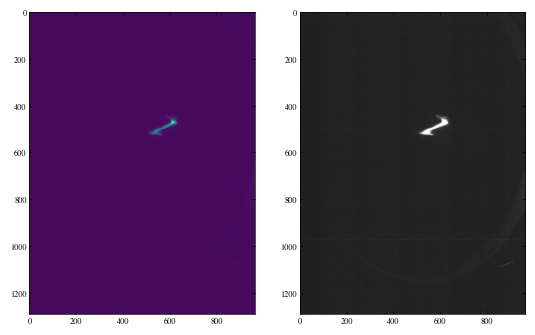

In [8]:
img = ds.getImage("DTOTR2", 0)

ax = plt.subplot(121)
ax.imshow(img.data)
ax2 = plt.subplot(122)
ax2.imshow(img.image)
plt.show()

Image backgrounds can be retrieved with ```getImageBackground```, then subtracted using  ```subtract_background```. If multiple background images were taken, ```getImageBackground``` will automatically average them.

In [9]:
bkgd = ds.getImageBackground("DTOTR2")
img.subtract_background(bkgd)

## DAQ Scans

The values of the scan parameters at each step are stored in the attribute ```scan_vals``` and number of steps in ```Nsteps```. ```x``` is the scan value for every matched shot and ```x_steps``` is the unique steps that have matched shots (sometimes in scans a camera dies and entire steps don't have matched shots). 

Scalar data for each step can be averaged using ```averageByStep```. Average by step includes the ability to reject outliers or operate only on select shots, see docstring for details.

```blankFigure``` provides an empty figure with metadata printed in the top corner.

[-5 -4 -3 -2 -1  0  1  2  3  4  5]
11 11
[-5 -4 -3 -2 -1  0  1  2  3  4  5]


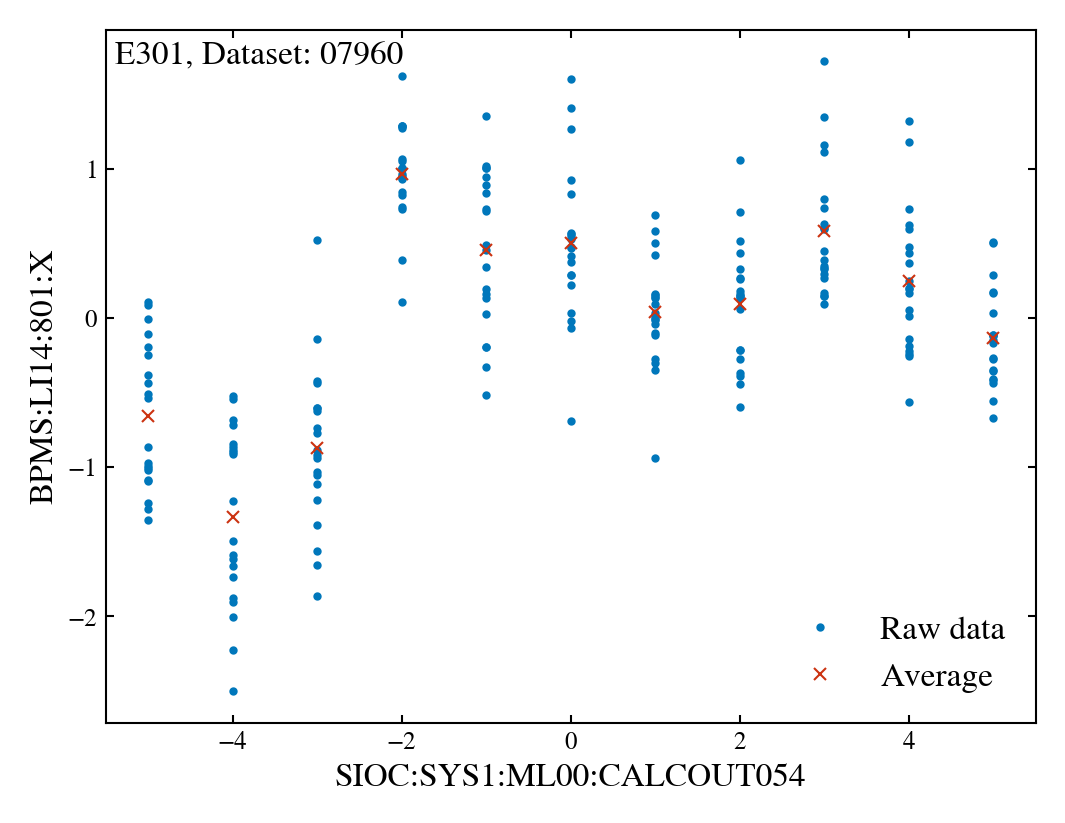

In [25]:
print(ds.scan_vals)
print(ds.Nsteps, len(ds.scan_vals))
print(ds.x_steps)

scalar_avg, scalar_std, _ = ds.averageByStep(scalar)

fig, ax = ds.blankFigure()
ax.plot(ds.x, scalar, ".", markersize=3, label="Raw data")
ax.plot(ds.x_steps, scalar_avg, "x", markersize=3, label="Average")
ax.set_xlabel(f"{ds.params['scanPVs']}")
ax.set_ylabel("BPMS:LI14:801:X")
ax.legend(loc=4)
plt.show()

This plot can also be created automatically with ```plotRawByStep```. A better plot, that shows the average and standard deviation at each step, can be created with ```plotScalarByStep```, this can take either a PV or a scalar as an argument.

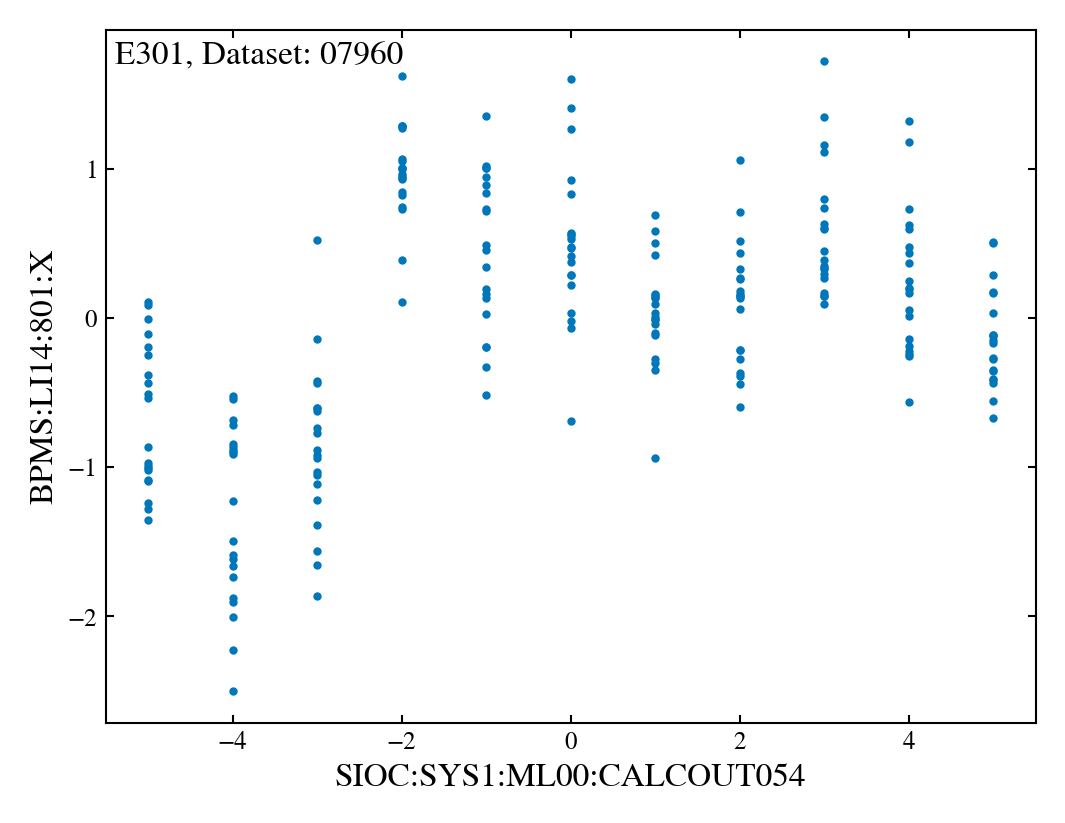

In [12]:
fig, ax = ds.plotRawByStep(pv="BPMS:LI14:801:X")
plt.show()

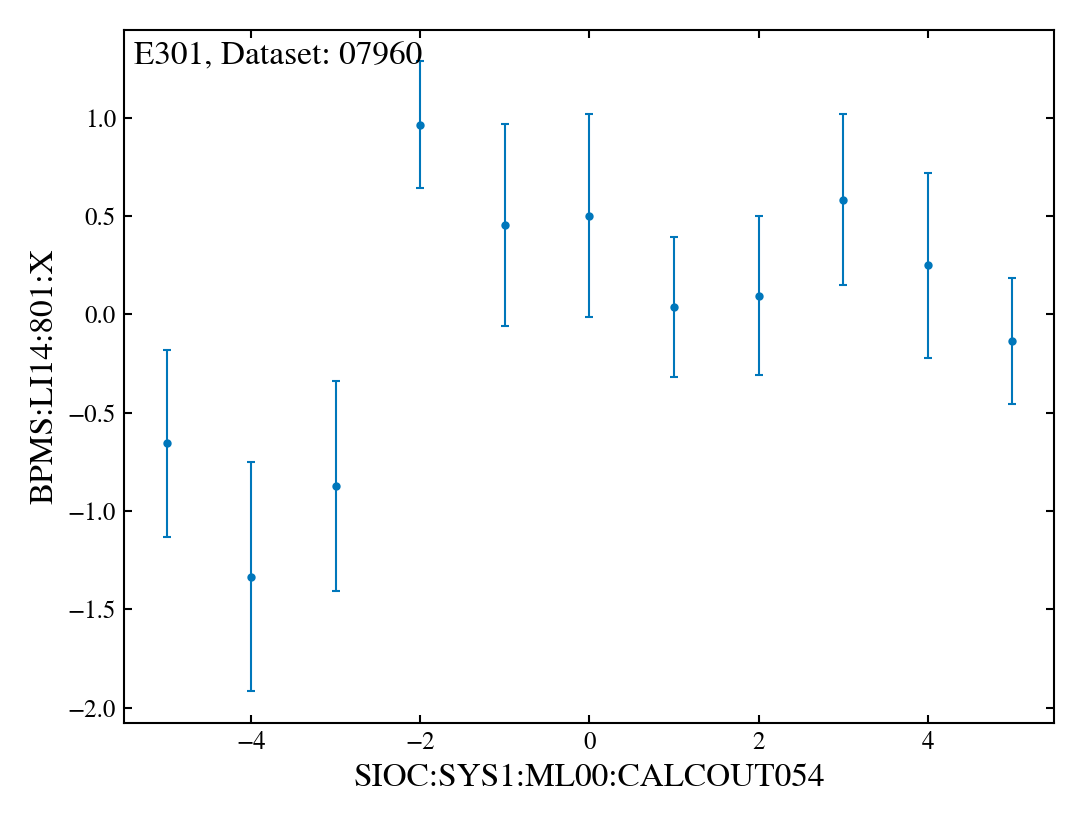

In [13]:
fig, ax = ds.plotScalarByStep(pv="BPMS:LI14:801:X")
plt.show()

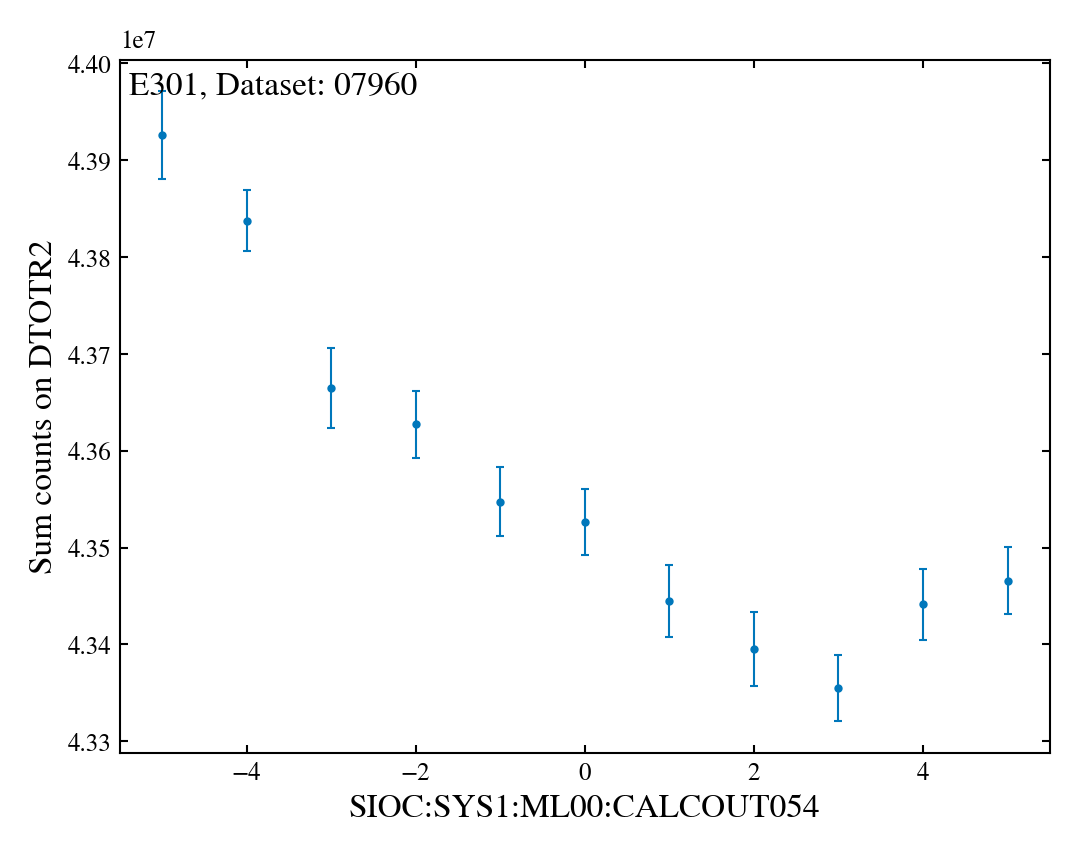

In [16]:
sumCts = np.empty(ds.N)
for i in range(ds.N):
    img = ds.getImage("DTOTR2", i)
    sumCts[i] = np.sum(img.data)

fig, ax = ds.plotScalarByStep(scalar=sumCts)
ax.set_ylabel("Sum counts on DTOTR2")
plt.show()

## Accessing Nonmatched Data

Sometimes the images can't be matched to the scalars in a dataset, but the data is still useful. In this case, both the matched and unmatched shots can be accessed with ```getRawScalar``` and ```getImage_NoMatch```. In the example dataset, every imaged matched so ```getImage_NoMatch``` doesn't access any additional data.

In [29]:
scalar = ds.getRawScalar("BSA_List_S14", "BPMS:LI14:801:X")
print(f"scalar has {len(scalar)} elements, the first element is {scalar[0]}")
print(f"{ds.N} matched shots in the dataset")

scalar has 416 elements, the first element is -0.9704586267471313
220 matched shots in the dataset


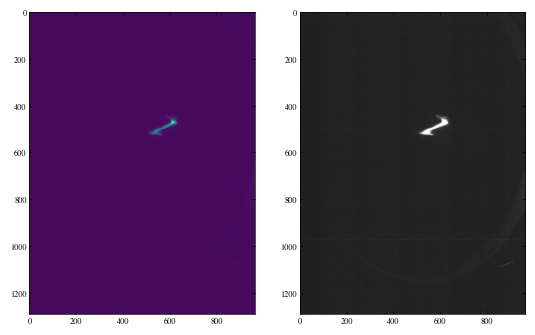

In [28]:
img = ds.getImage_NoMatch("DTOTR2", 0)

ax = plt.subplot(121)
ax.imshow(img.data)
ax2 = plt.subplot(122)
ax2.imshow(img.image)
plt.show()

## Some Other Plotting Tools

```plotCorrelation```

```correlationGrid```

```outlierComparisonPlot```

```cameraGif```

Camera stuff
* Image modification
 * rotate
 * crop
 * filter
* Center finding